In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
import seaborn as sns

c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Wartość zniekształceń (inercja): 98.79


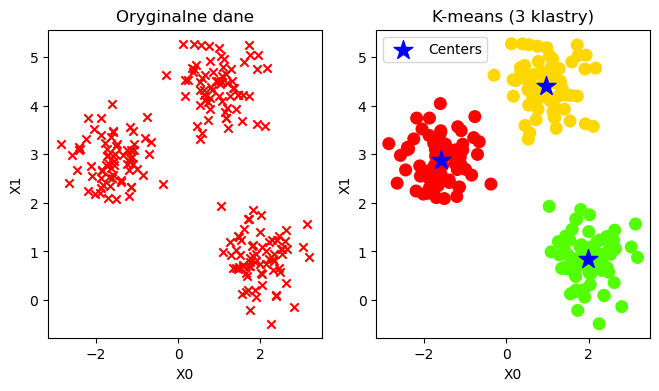

In [3]:
X, y = make_blobs(n_samples=210, centers=3, n_features=2, cluster_std=0.5, shuffle=True, random_state=0)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X[:,0], X[:,1], c='red', marker='x')
plt.title('Oryginalne dane')
plt.xlabel('X0')
plt.ylabel('X1')

km = KMeans(
    n_clusters=3,           # liczba skupień
    init='random',          # losowe próbki do wyznaczania centroidów
    n_init=10,              # liczba uruchomień z różnymi centroidami
    max_iter=300,           # maksymalna liczba iteracji
    tol=1e-4,              # tolerancja dla kryteriów zbieżności
    random_state=0          # dla powtarzalności wyników
)

labels = km.fit_predict(X)

plt.subplot(1, 3, 2)
plt.scatter(X[:,0], X[:,1], s=70, c=km.labels_, cmap=plt.cm.prism) 
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('K-means (3 klastry)')

print(f"Wartość zniekształceń (inercja): {km.inertia_:.2f}")

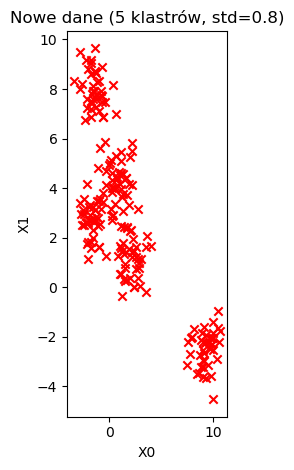

c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


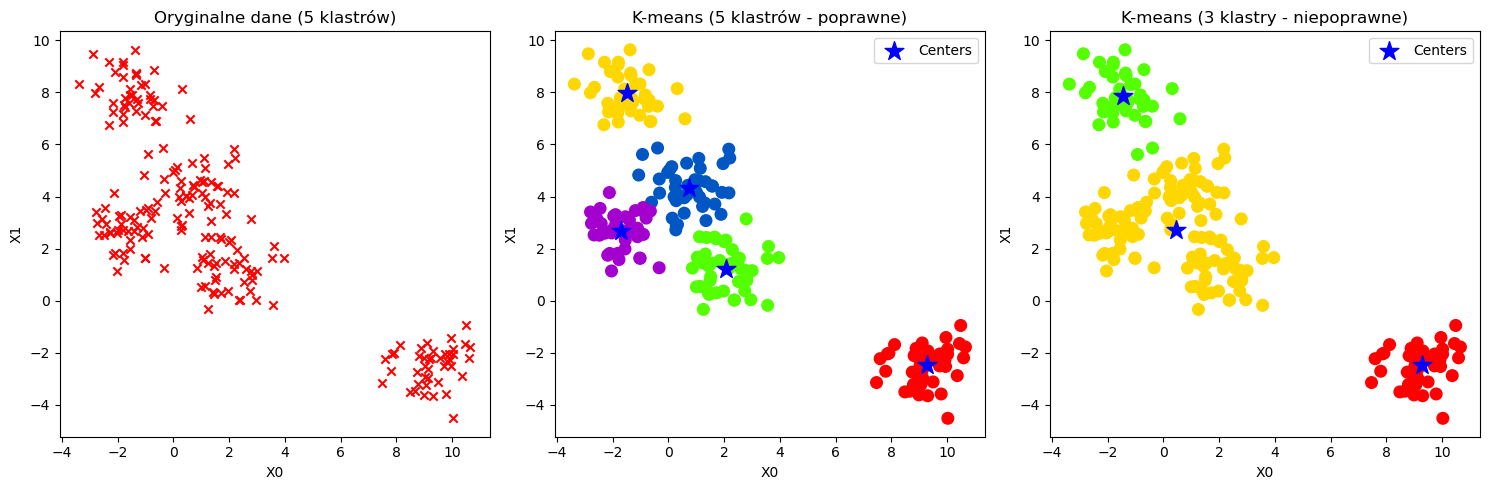

In [5]:
X2, y2 = make_blobs(n_samples=210, centers=5, n_features=2, cluster_std=0.8, shuffle=True, random_state=0)

plt.subplot(1, 3, 3)
plt.scatter(X2[:,0], X2[:,1], c='red', marker='x')
plt.title('Nowe dane (5 klastrów, std=0.8)')
plt.xlabel('X0')
plt.ylabel('X1')

plt.tight_layout()
plt.show()

km_correct = KMeans(n_clusters=5, init='random', random_state=0)
labels_correct = km_correct.fit_predict(X2)

km_incorrect = KMeans(n_clusters=3, init='random', random_state=0)
labels_incorrect = km_incorrect.fit_predict(X2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X2[:,0], X2[:,1], c='red', marker='x')
plt.title('Oryginalne dane (5 klastrów)')
plt.xlabel('X0')
plt.ylabel('X1')

plt.subplot(1, 3, 2)
plt.scatter(X2[:,0], X2[:,1], s=70, c=km_correct.labels_, cmap=plt.cm.prism)
plt.scatter(km_correct.cluster_centers_[:, 0], km_correct.cluster_centers_[:, 1], 
            marker='*', s=200, color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('K-means (5 klastrów - poprawne)')

plt.subplot(1, 3, 3)
plt.scatter(X2[:,0], X2[:,1], s=70, c=km_incorrect.labels_, cmap=plt.cm.prism)
plt.scatter(km_incorrect.cluster_centers_[:, 0], km_incorrect.cluster_centers_[:, 1], 
            marker='*', s=200, color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('K-means (3 klastry - niepoprawne)')

plt.tight_layout()
plt.show()



In [7]:
results_comparison = []

for seed in range(10): 
    # K-means z random init
    km_random = KMeans(n_clusters=3, init='random', random_state=seed, n_init=1)
    km_random.fit(X)
    
    # K-means++
    km_plus = KMeans(n_clusters=3, init='k-means++', random_state=seed, n_init=1)
    km_plus.fit(X)
    
    results_comparison.append({
        'seed': seed,
        'random_inertia': km_random.inertia_,
        'kmeans_plus_inertia': km_plus.inertia_
    })

df_comparison = pd.DataFrame(results_comparison)
print("Porównanie inercji dla różnych stanów losowych:")
print(df_comparison)
print(f"\nŚrednia inercja - random init: {df_comparison['random_inertia'].mean():.2f}")


Porównanie inercji dla różnych stanów losowych:
   seed  random_inertia  kmeans_plus_inertia
0     0       98.787108            98.787108
1     1       98.787108            98.787108
2     2       98.787108            98.787108
3     3       98.787108            98.787108
4     4       98.787108            98.787108
5     5       98.787108            98.787108
6     6       98.787108            98.787108
7     7      399.537394            98.787108
8     8       98.787108            98.787108
9     9       98.787108            98.787108

Średnia inercja - random init: 128.86


c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: User

c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: User

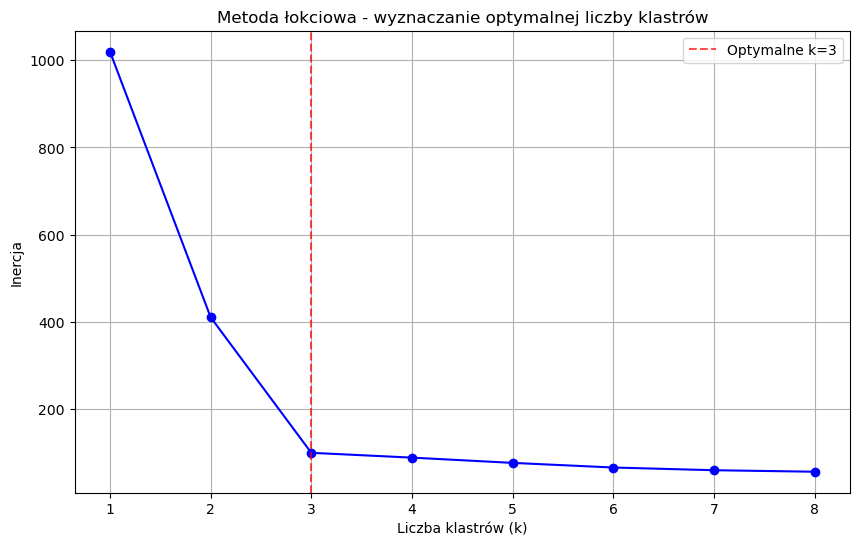

Wyniki metody łokciowej:
k=1: inercja=1019.90
k=2: inercja=410.05
k=3: inercja=98.79
k=4: inercja=87.74
k=5: inercja=75.67
k=6: inercja=65.04
k=7: inercja=58.82
k=8: inercja=55.37


In [8]:
def elbow_method(X, max_k=10):
    """
    Implementacja metody łokciowej do wyznaczania optymalnej liczby klastrów
    """
    inertias = []
    k_range = range(1, max_k + 1)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    
    return k_range, inertias

k_range, inertias = elbow_method(X, max_k=8)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Inercja')
plt.title('Metoda łokciowa - wyznaczanie optymalnej liczby klastrów')
plt.grid(True)

plt.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='Optymalne k=3')
plt.legend()
plt.show()

print("Wyniki metody łokciowej:")
for k, inertia in zip(k_range, inertias):
    print(f"k={k}: inercja={inertia:.2f}")


c:\Users\Szcze\anaconda3\envs\PythonML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


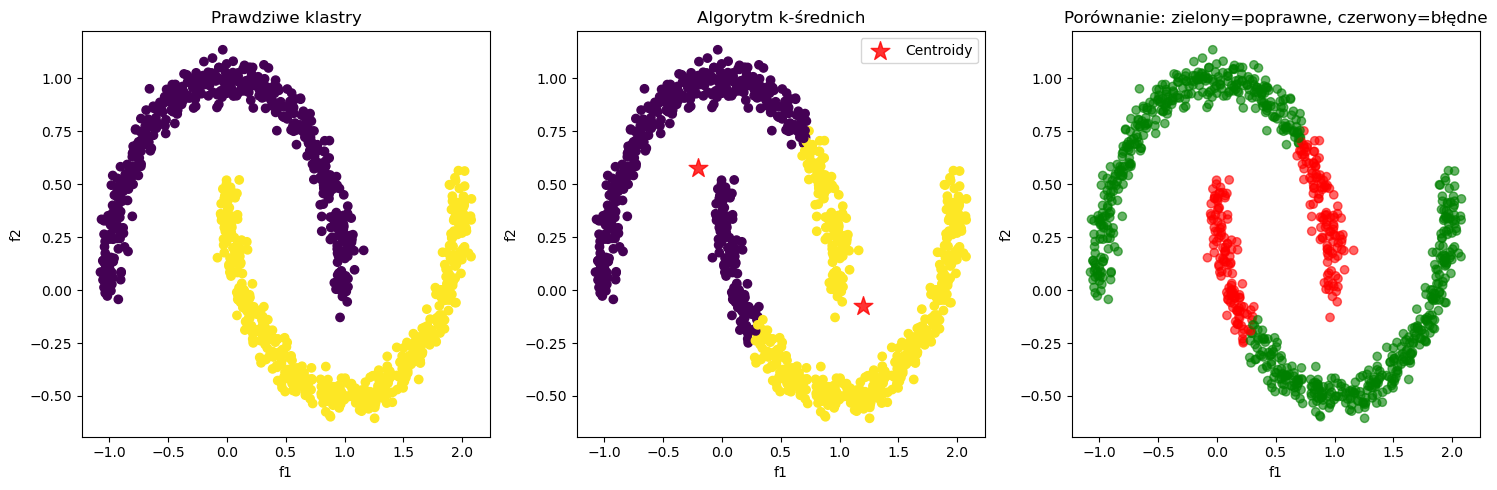

In [9]:
x, y_true = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns=['f1', 'f2'])

km_moon = KMeans(n_clusters=2, init='k-means++', random_state=0)
y_km = km_moon.fit_predict(x)

X_moon['k_means'] = y_km
X_moon['prawdziwe'] = y_true

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(X_moon['f1'], X_moon['f2'], c=X_moon['prawdziwe'], cmap='viridis')
plt.title('Prawdziwe klastry')
plt.xlabel('f1')
plt.ylabel('f2')

plt.subplot(1, 3, 2)
plt.scatter(X_moon['f1'], X_moon['f2'], c=X_moon['k_means'], cmap='viridis')
plt.scatter(km_moon.cluster_centers_[:, 0], km_moon.cluster_centers_[:, 1], 
            c='red', s=200, alpha=0.8, marker='*', label='Centroidy')
plt.title('Algorytm k-średnich')
plt.xlabel('f1')
plt.ylabel('f2')
plt.legend()

plt.subplot(1, 3, 3)
colors = ['red' if pred != true else 'green' for pred, true in zip(y_km, y_true)]
plt.scatter(X_moon['f1'], X_moon['f2'], c=colors, alpha=0.6)
plt.title('Porównanie: zielony=poprawne, czerwony=błędne')
plt.xlabel('f1')
plt.ylabel('f2')
plt.tight_layout()
plt.show()


In [10]:
accuracy = np.mean(y_km == y_true)
accuracy_flipped = np.mean(y_km == (1 - y_true))
best_accuracy = max(accuracy, accuracy_flipped)

print(f"Dokładność klasyfikacji: {best_accuracy:.2f} ({best_accuracy*100:.1f}%)")
print(f"Inercja: {km_moon.inertia_:.2f}")


Dokładność klasyfikacji: 0.75 (75.2%)
Inercja: 403.21
